# Exploratory Data analysis of Wine Quality Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('winequality-red.csv')
# Step 1: Basic Information
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows:")
print(data.head())
# Step 2: Summary Statistics
print("\nSummary Statistics:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

First 5 Rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7

## Missing values

In [3]:
# Step 3: Check for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
data['quality_binary'] = (data['quality'] >= 6).astype(int)
print("\nBinary Quality Distribution:")
print(data['quality_binary'].value_counts(normalize=True))


Binary Quality Distribution:
quality_binary
1    0.534709
0    0.465291
Name: proportion, dtype: float64
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


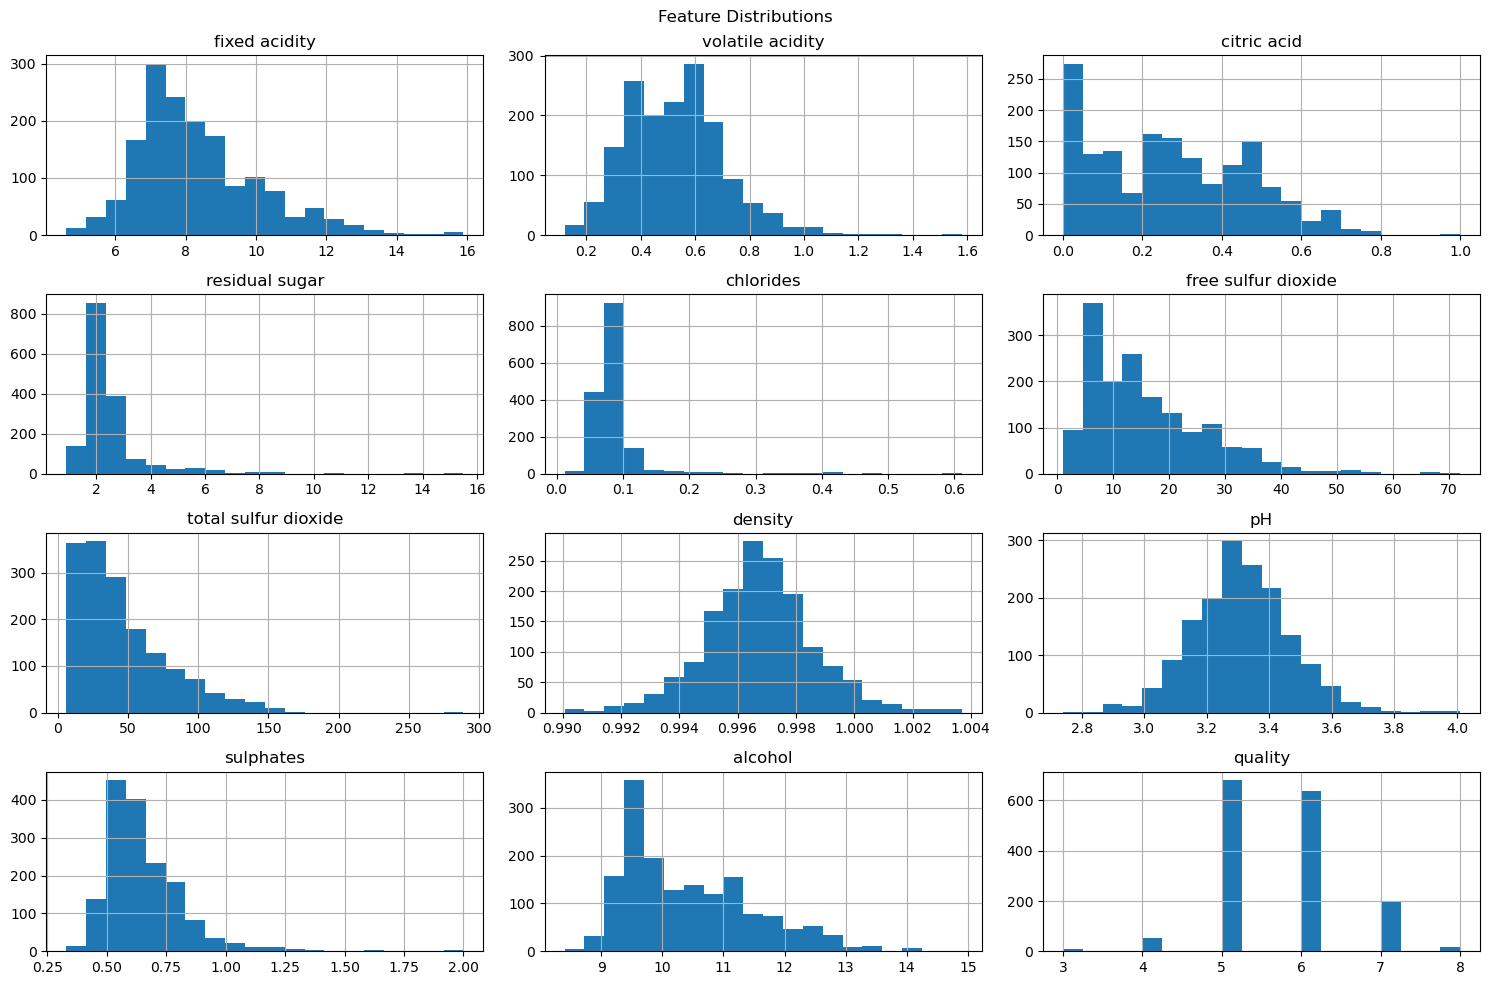

In [5]:
# Step 5: Distribution of Features
# Plot histograms for all numerical features
data.drop('quality_binary', axis=1).hist(bins=20, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

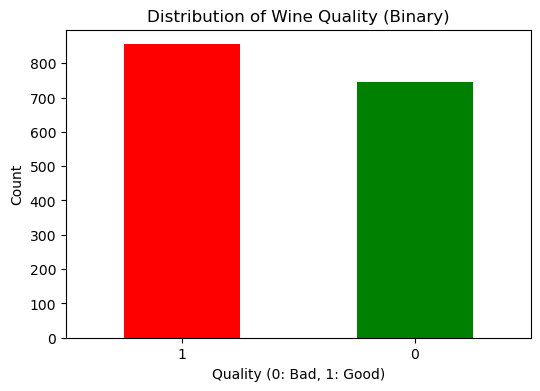

In [6]:
# Step 6: Target Variable Distribution
plt.figure(figsize=(6, 4))
data['quality_binary'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Wine Quality (Binary)')
plt.xlabel('Quality (0: Bad, 1: Good)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

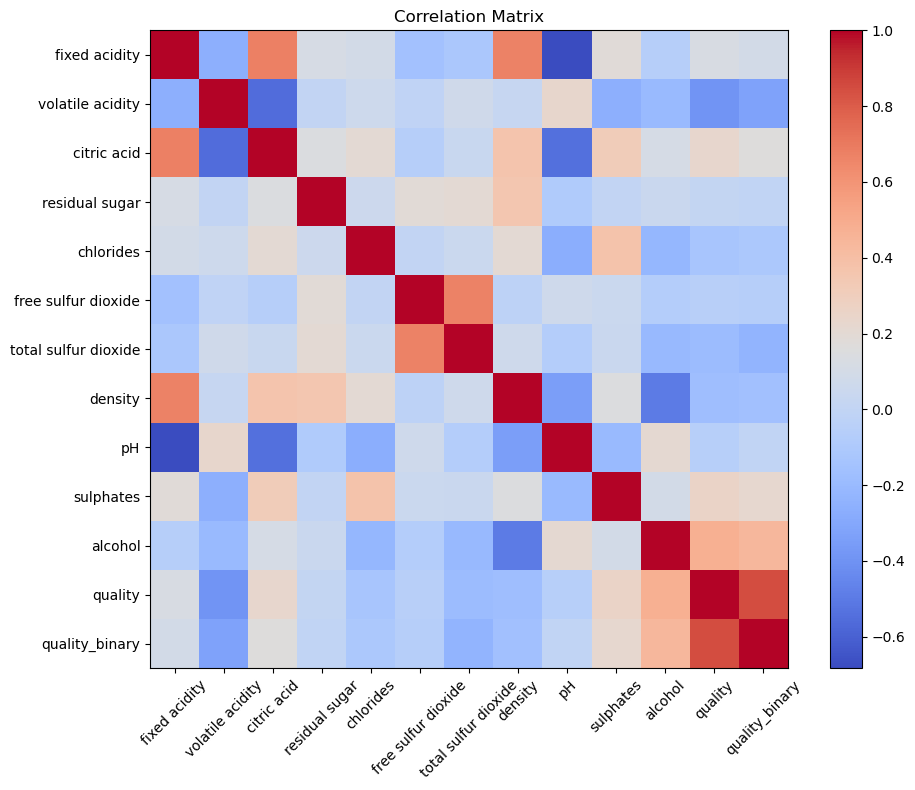

In [7]:
# Step 7: Correlation Analysis
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [8]:
# Correlation with binary quality
print("\nCorrelation with Binary Quality:")
print(corr_matrix['quality_binary'].sort_values(ascending=False))


Correlation with Binary Quality:
quality_binary          1.000000
quality                 0.848279
alcohol                 0.434751
sulphates               0.218072
citric acid             0.159129
fixed acidity           0.095093
residual sugar         -0.002160
pH                     -0.003264
free sulfur dioxide    -0.061757
chlorides              -0.109494
density                -0.159110
total sulfur dioxide   -0.231963
volatile acidity       -0.321441
Name: quality_binary, dtype: float64


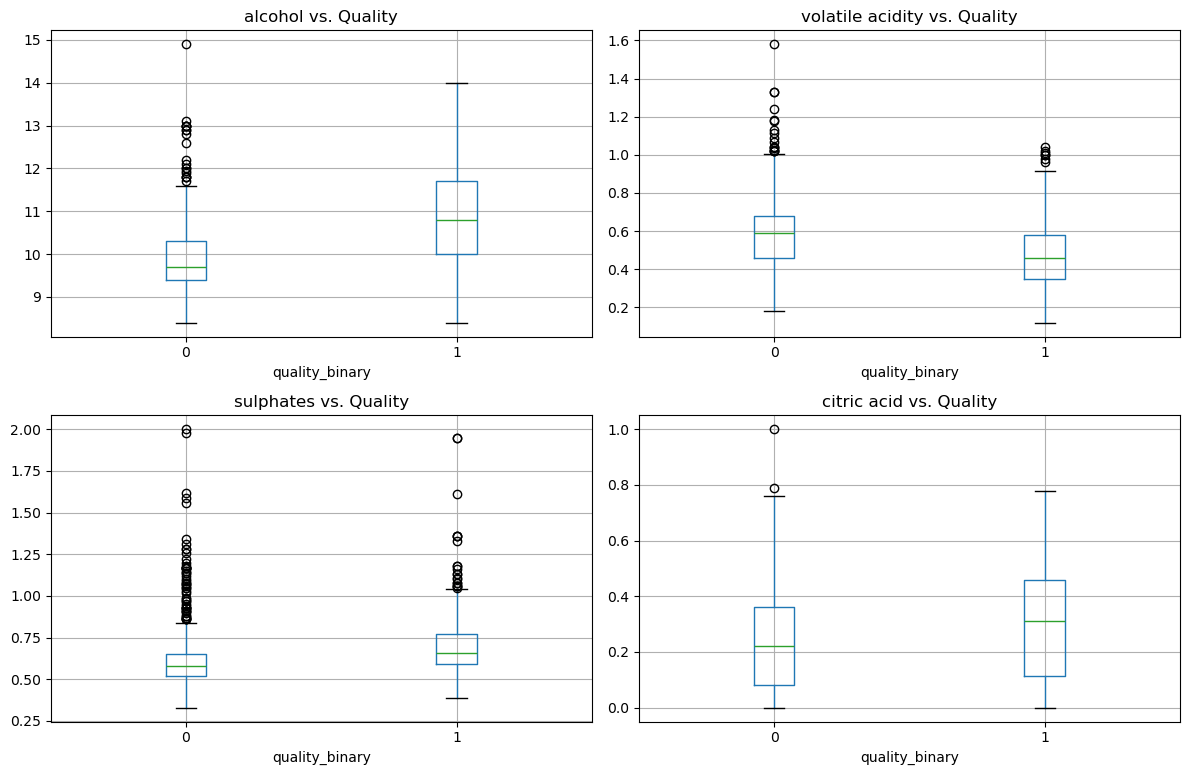

In [9]:
# Step 8: Feature vs. Target Analysis
# Box plots for key features vs. quality
key_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    data.boxplot(column=feature, by='quality_binary', ax=plt.gca())
    plt.title(f'{feature} vs. Quality')
    plt.suptitle('')  # Remove default suptitle
plt.tight_layout()
plt.show()

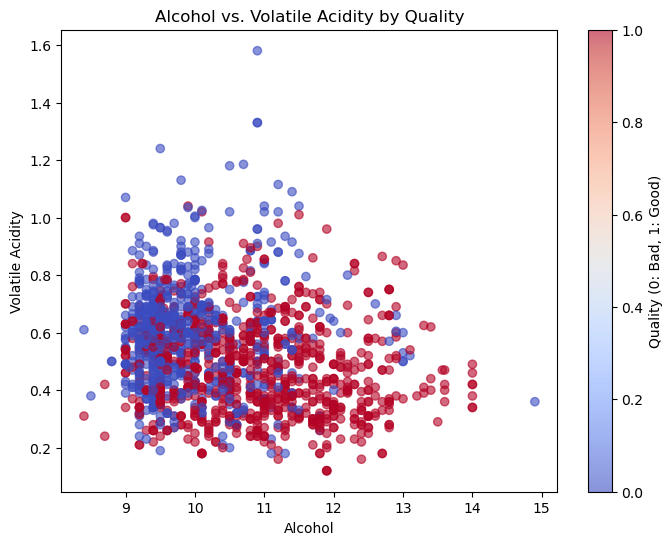

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(data['alcohol'], data['volatile acidity'], c=data['quality_binary'], cmap='coolwarm', alpha=0.6)
plt.colorbar(label='Quality (0: Bad, 1: Good)')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.title('Alcohol vs. Volatile Acidity by Quality')
plt.show()

# Implementing the Decision tree

Decision Tree Accuracy: 0.725

Classification Report:
              precision    recall  f1-score   support

     Bad (0)       0.66      0.77      0.71       141
    Good (1)       0.79      0.69      0.74       179

    accuracy                           0.72       320
   macro avg       0.73      0.73      0.72       320
weighted avg       0.73      0.72      0.73       320



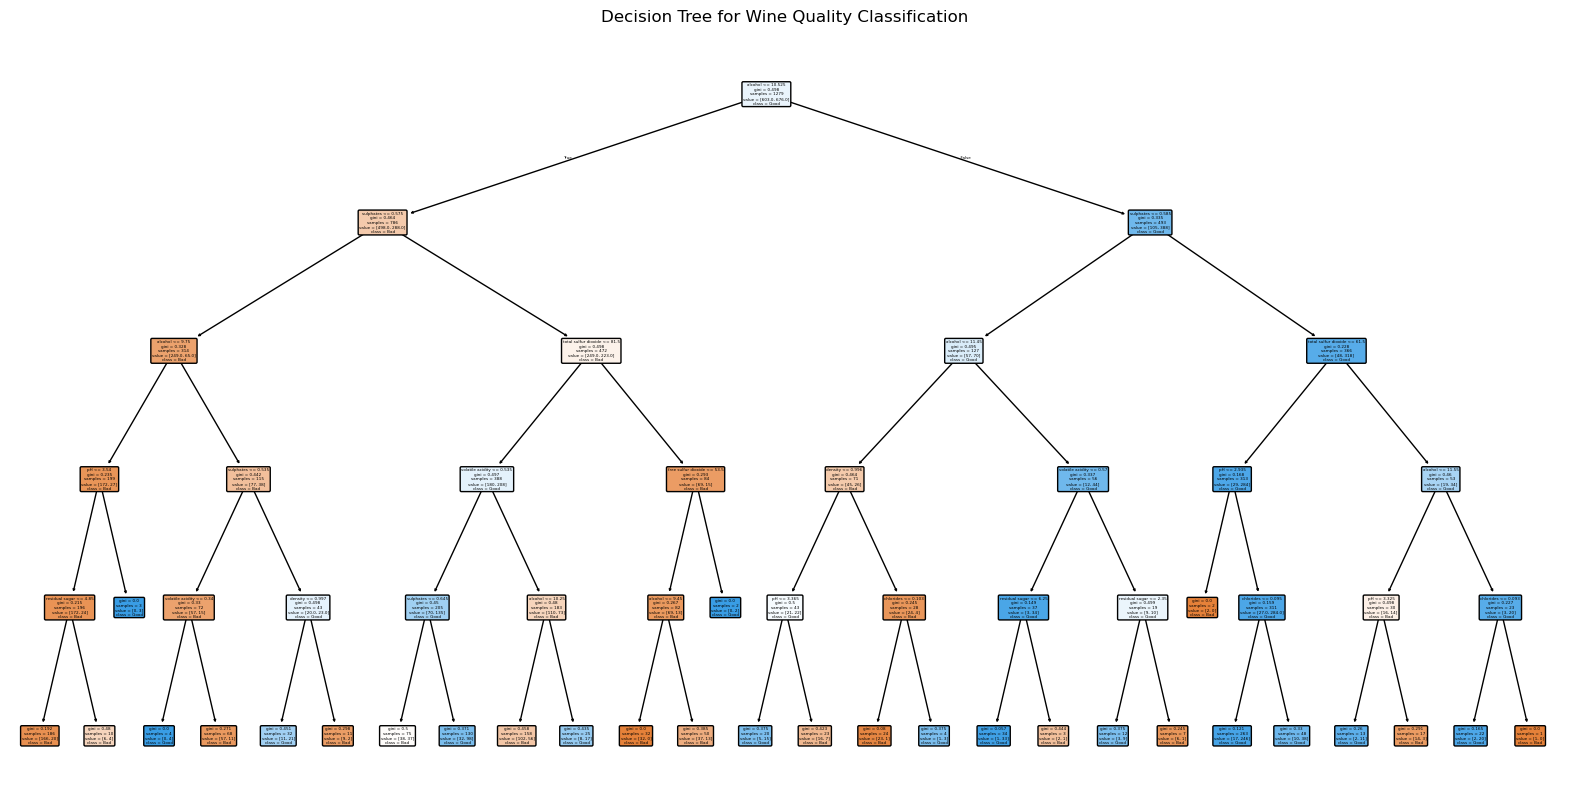

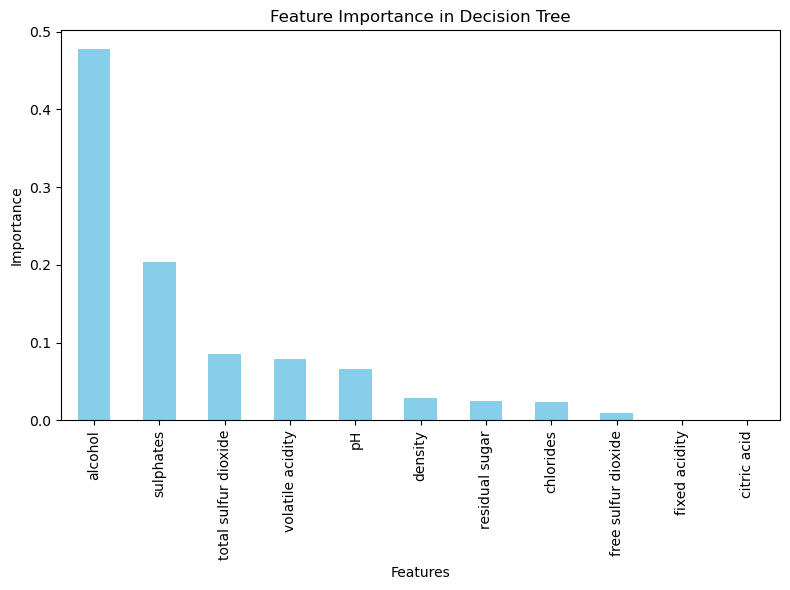

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree

# Load the dataset
data = pd.read_csv('winequality-red.csv')

# Convert quality to binary (Good: >=6, Bad: <6)
data['quality_binary'] = (data['quality'] >= 6).astype(int)

# Features and target
X = data.drop(['quality', 'quality_binary'], axis=1)
y = data['quality_binary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad (0)', 'Good (1)']))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Bad', 'Good'], filled=True, rounded=True)
plt.title('Decision Tree for Wine Quality Classification')
plt.show()

# Feature Importance
feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Implementing a neural network for the same task 

Epoch [20/1000], Loss: 0.4816, Train Acc: 0.7756, Test Acc: 0.7469
Epoch [40/1000], Loss: 0.4658, Train Acc: 0.7834, Test Acc: 0.7625
Epoch [60/1000], Loss: 0.4555, Train Acc: 0.7920, Test Acc: 0.7625
Epoch [80/1000], Loss: 0.4471, Train Acc: 0.7944, Test Acc: 0.7688
Epoch [100/1000], Loss: 0.4388, Train Acc: 0.8030, Test Acc: 0.7625
Epoch [120/1000], Loss: 0.4304, Train Acc: 0.8077, Test Acc: 0.7594
Epoch [140/1000], Loss: 0.4229, Train Acc: 0.8084, Test Acc: 0.7688
Epoch [160/1000], Loss: 0.4148, Train Acc: 0.8077, Test Acc: 0.7656
Epoch [180/1000], Loss: 0.4054, Train Acc: 0.8108, Test Acc: 0.7719
Epoch [200/1000], Loss: 0.3967, Train Acc: 0.8155, Test Acc: 0.7656
Epoch [220/1000], Loss: 0.3894, Train Acc: 0.8249, Test Acc: 0.7656
Epoch [240/1000], Loss: 0.3831, Train Acc: 0.8296, Test Acc: 0.7719
Epoch [260/1000], Loss: 0.3779, Train Acc: 0.8233, Test Acc: 0.7719
Epoch [280/1000], Loss: 0.3728, Train Acc: 0.8264, Test Acc: 0.7750
Epoch [300/1000], Loss: 0.3687, Train Acc: 0.8272, T

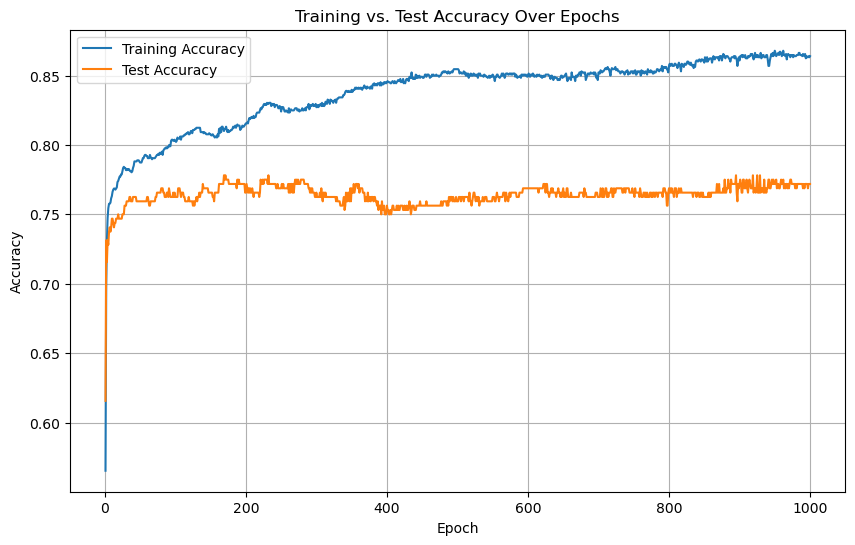

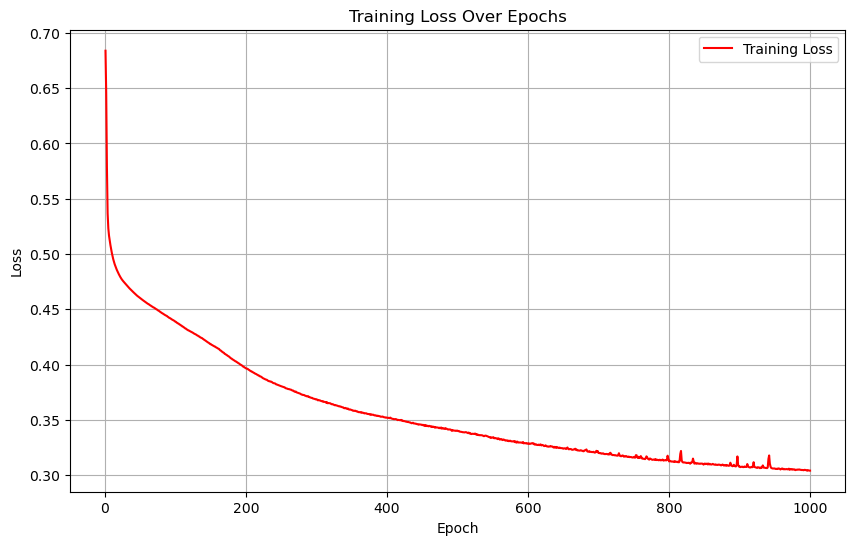

In [16]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load the dataset
data = pd.read_csv('winequality-red.csv')

# Convert quality to binary (Good: >=6, Bad: <6)
data['quality_binary'] = (data['quality'] >= 6).astype(int)

# Features and target
X = data.drop(['quality', 'quality_binary'], axis=1).values
y = data['quality_binary'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Define Neural Network model
class WineQualityNN(nn.Module):
    def __init__(self, input_size):
        super(WineQualityNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 16)
        self.relu1 = nn.ReLU()
        self.layer2 = nn.Linear(16, 8)
        self.relu2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.relu2(self.layer2(x))
        x = self.sigmoid(self.output(x))
        return x

# Initialize model, loss function, and optimizer
model = WineQualityNN(input_size=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with accuracy tracking
num_epochs = 1000
batch_size = 16
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    train_preds = []
    train_labels = []
    
    # Training
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        train_preds.extend((outputs >= 0.5).float().numpy().flatten())
        train_labels.extend(y_batch.numpy().flatten())
    
    # Compute training metrics
    train_loss = epoch_loss / (len(X_train_tensor) // batch_size + 1)
    train_accuracy = accuracy_score(train_labels, train_preds)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_preds = (test_outputs >= 0.5).float().numpy().flatten()
        test_accuracy = accuracy_score(y_test, test_preds)
        test_accuracies.append(test_accuracy)
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Acc: {test_accuracy:.4f}')

# Final evaluation
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = (y_pred_tensor >= 0.5).float().numpy().flatten()

# Calculate final metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Neural Network Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad (0)', 'Good (1)']))

# Plot training and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Epoch [20/2000], Loss: 0.5181, Train Acc: 0.7608, Test Acc: 0.7344
Epoch [21/2000]: Learning rate reduced to 0.000500
Early stopping at epoch 30

Final Neural Network Accuracy: 0.7375

Classification Report:
              precision    recall  f1-score   support

     Bad (0)       0.68      0.77      0.72       141
    Good (1)       0.80      0.72      0.75       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



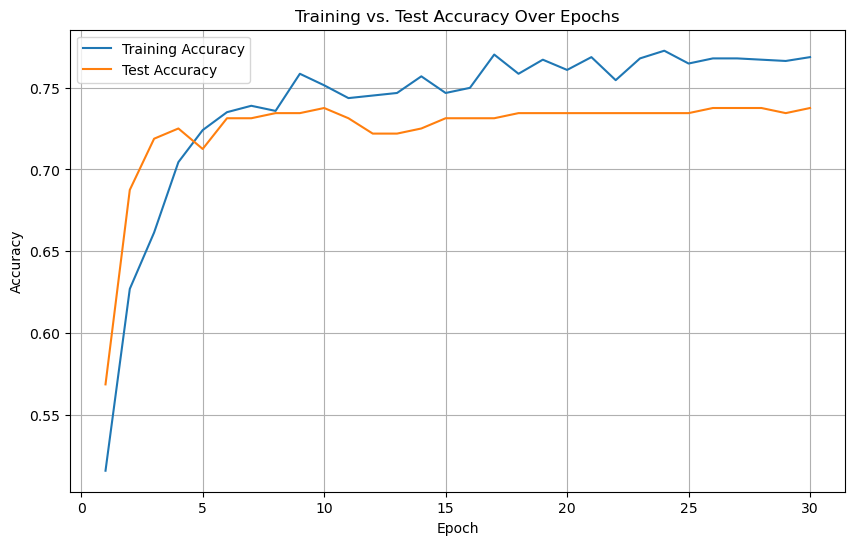

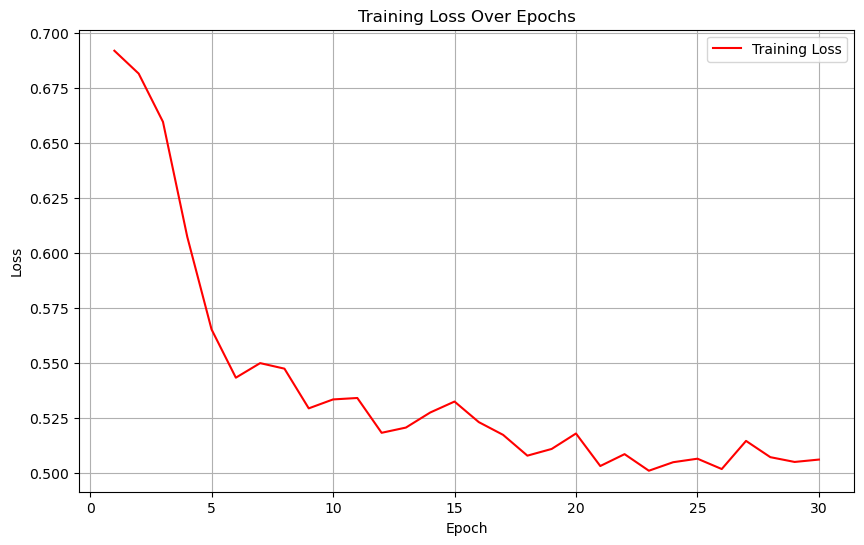

In [20]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Load the dataset
data = pd.read_csv('winequality-red.csv')

# Convert quality to binary (Good: >=6, Bad: <6)
data['quality_binary'] = (data['quality'] >= 6).astype(int)

# Features and target
X = data.drop(['quality', 'quality_binary'], axis=1).values
y = data['quality_binary'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Define enhanced Neural Network model
class WineQualityNN(nn.Module):
    def __init__(self, input_size):
        super(WineQualityNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 32)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.layer2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.layer3 = nn.Linear(16, 8)
        self.relu3 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu1(self.layer1(x))
        x = self.dropout1(x)
        x = self.relu2(self.layer2(x))
        x = self.dropout2(x)
        x = self.relu3(self.layer3(x))
        x = self.sigmoid(self.output(x))
        return x

# Initialize model, loss function, optimizer, and scheduler
model = WineQualityNN(input_size=X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=10)

# Training loop with accuracy tracking and early stopping
num_epochs = 2000
batch_size = 32
train_losses = []
train_accuracies = []
test_accuracies = []
best_test_acc = 0
patience = 20
counter = 0
prev_lr = optimizer.param_groups[0]['lr']

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    train_preds = []
    train_labels = []
    
    # Training
    for i in range(0, len(X_train_tensor), batch_size):
        X_batch = X_train_tensor[i:i+batch_size]
        y_batch = y_train_tensor[i:i+batch_size]
        
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        train_preds.extend((outputs >= 0.5).float().numpy().flatten())
        train_labels.extend(y_batch.numpy().flatten())
    
    # Compute training metrics
    train_loss = epoch_loss / (len(X_train_tensor) // batch_size + 1)
    train_accuracy = accuracy_score(train_labels, train_preds)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_preds = (test_outputs >= 0.5).float().numpy().flatten()
        test_accuracy = accuracy_score(y_test, test_preds)
        test_accuracies.append(test_accuracy)
    
    # Scheduler step (based on test accuracy)
    scheduler.step(test_accuracy)
    
    # Check for learning rate change
    current_lr = optimizer.param_groups[0]['lr']
    if current_lr != prev_lr:
        print(f'Epoch [{epoch+1}/{num_epochs}]: Learning rate reduced to {current_lr:.6f}')
        prev_lr = current_lr
    
    # Early stopping
    if test_accuracy > best_test_acc:
        best_test_acc = test_accuracy
        counter = 0
        # Save best model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f'Early stopping at epoch {epoch+1}')
            break
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Acc: {test_accuracy:.4f}')

# Load best model
model.load_state_dict(torch.load('best_model.pth', weights_only=True))

# Final evaluation
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    y_pred = (y_pred_tensor >= 0.5).float().numpy().flatten()

# Calculate final metrics
accuracy = accuracy_score(y_test, y_pred)
print("\nFinal Neural Network Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad (0)', 'Good (1)']))

# Plot training and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()